In [115]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import datasets, metrics, model_selection, svm
import statsmodels.api as sm
import shap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h4>Read in building and electical consumption data</H4>

In [124]:
# read in electricity consumption and building data
kwh_year_df = pd.read_csv('clean-data/kwh_year.csv')

In [125]:
kwh_year_df = kwh_year_df.drop(columns='Unnamed: 0')

In [126]:
# drop non numerical column
kwh_year_df = kwh_year_df.drop(columns=['Service Address'])

<h4>Identify colinear features</h4>

In [127]:
# identify collinear columns
kwh_year_df.corr()

,avg_kwh,Latitude,Longitude,Parcel Number,prop_id,Effective_YrBlt,Heated_SquareFeet,Stories,kwh_per_sqft,code_release
avg_kwh,1.000000,-0.079952,-0.018102,0.010132,0.026818,0.063023,0.185103,0.076795,0.508535,0.064757
Latitude,-0.079952,1.000000,-0.134391,-0.377149,-0.498860,0.046609,-0.017014,-0.136254,-0.098716,0.048259
Longitude,-0.018102,-0.134391,1.000000,0.680909,0.775367,-0.262894,-0.091056,-0.083666,0.010590,-0.264918
Parcel Number,0.010132,-0.377149,0.680909,1.000000,0.849588,-0.154652,-0.058992,0.021543,0.048703,-0.155143
prop_id,0.026818,-0.498860,0.775367,0.849588,1.000000,-0.215820,-0.068158,0.010378,0.055169,-0.216317
Effective_YrBlt,0.063023,0.046609,-0.262894,-0.154652,-0.215820,1.000000,0.028064,0.024884,0.069811,0.993516
Heated_SquareFeet,0.185103,-0.017014,-0.091056,-0.058992,-0.068158,0.028064,1.000000,0.474447,-0.035214,0.030020
Stories,0.076795,-0.136254,-0.083666,0.021543,0.010378,0.024884,0.474447,1.000000,-0.067929,0.029459
kwh_per_sqft,0.508535,-0.098716,0.010590,0.048703,0.055169,0.069811,-0.035214,-0.067929,1.000000,0.067824
code_release,0.064757,0.048259,-0.264918,-0.155143,-0.216317,0.993516,0.030020,0.029459,0.067824,1.000000


<h4>Remove colinear features</h4>

In [128]:
col_kwh_year_df = kwh_year_df.drop(columns=['prop_id', 'Parcel Number', 'Effective_YrBlt', 'Stories']) 
col_kwh_year_df.columns

Index(['avg_kwh', 'Latitude', 'Longitude', 'Heated_SquareFeet', 'kwh_per_sqft',
       'code_release'],
      dtype='object')

<h4>Define Target variable and feature set</h4>

In [129]:
# define target variable column and X
y = col_kwh_year_df.pop('code_release')
X = col_kwh_year_df

<h4>Train, test split and instantiate linear regression models</h4>

In [85]:
# split data into 50/50 training & test sets for 
# building efficiency prediction accuracy 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50, random_state=1)

In [130]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 5884 to 10209
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_kwh            5384 non-null   float64
 1   Latitude           5384 non-null   float64
 2   Longitude          5384 non-null   float64
 3   Heated_SquareFeet  5384 non-null   float64
 4   kwh_per_sqft       5384 non-null   float64
dtypes: float64(5)
memory usage: 252.4 KB


<h4>Set benchmark model</h4>

In [131]:
alpha = 3.0
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge(alpha=alpha)
knn = KNeighborsRegressor(7)

In [132]:
folds = 15
#score = mean_squared_error()
linear_cv = cross_val_score(linear, X, y, cv=folds, scoring='neg_mean_squared_error')
lasso_cv = cross_val_score(lasso, X, y, cv=folds, scoring='neg_mean_squared_error')
ridge_cv = cross_val_score(ridge, X, y, cv=folds, scoring='neg_mean_squared_error')
knn_cv = cross_val_score(knn1, X, y, cv=folds, scoring='neg_mean_squared_error')

In [133]:
lin_cv_mean = linear_cv.mean()
lasso_cv_mean = lasso_cv.mean()
ridge_cv_mean = ridge_cv.mean()
knn_cv_mean = knn_cv1.mean()


print(lin_cv_mean, lasso_cv_mean, ridge_cv_mean, knn_cv_mean)

-11.92922891037909 -12.133392446670138 -11.956216857917832 -14.640032693545402


<h4>Ordinary Least Squares</h4>

In [134]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.mse_total)
# print(est2.summary())

11.637038790448663


<h4>Run random forest regressor</h4>

In [135]:
# instantiate RF and linear regression model
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
mse

8.078623196836446

#### Train top performing model on test set to generate predictions for Dash app

In [136]:
# instantiate training data as new test data for predictions
X_test2 = X_train 
y_test2 = y_train 

In [139]:
# instantiate and train new model of previous test set
rf_pred = RandomForestRegressor(n_estimators=200, max_depth=5, 
                                min_samples_split=5, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features=4, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, 
                                min_impurity_split=None, 
                                bootstrap=True)
rf_pred.fit(X_test2, y_test2)

RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=5,
                      n_estimators=200)

In [140]:
# generate prediction from previous training set
y_hat_pred = rf_pred.predict(X_train)

In [142]:
y_hat_pred[:5]

array([18.14988144, 22.20741509, 20.14180297, 18.12589556, 18.84989449])

In [149]:
# convert prediction array to df
y_hat_pred = pd.DataFrame(y_hat_pred)

#### Feature importance

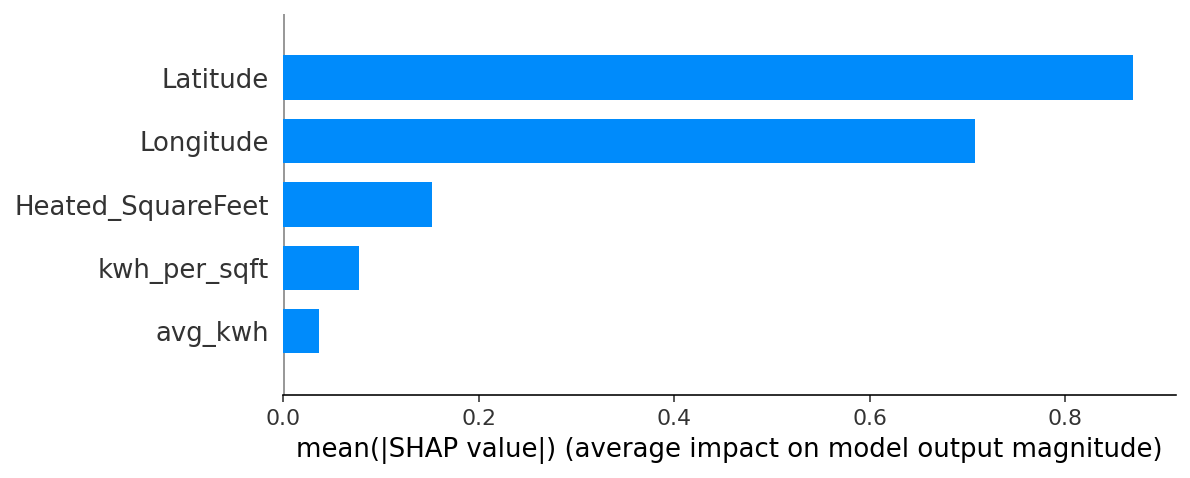

<Figure size 432x288 with 0 Axes>

In [143]:
# analyze impact of each dimension on predictions
shap_values = shap.TreeExplainer(rf_pred).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.savefig('images/shap_values.png')

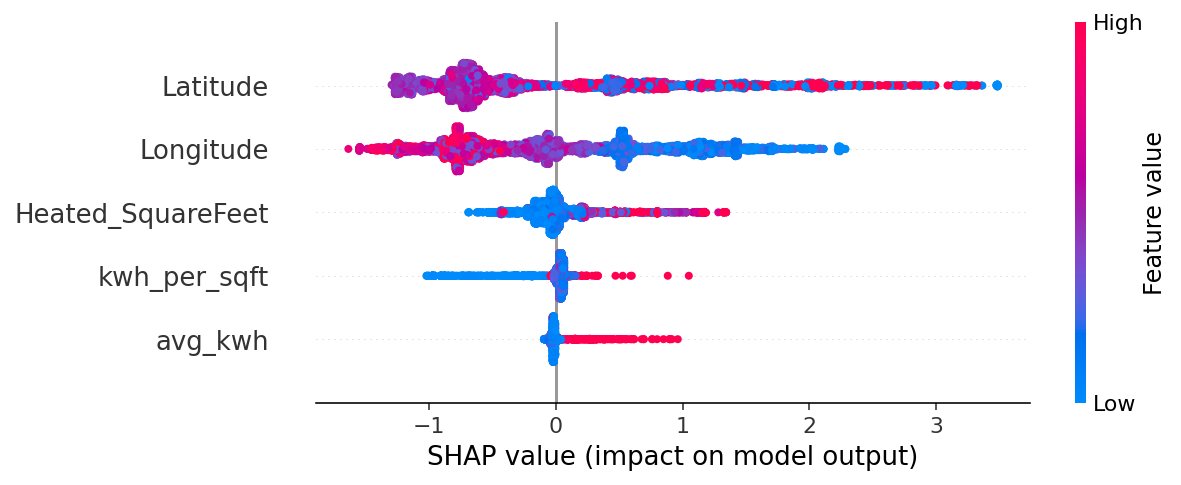

<Figure size 432x288 with 0 Axes>

In [144]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
plt.savefig('images/feature_importance_shap.png')

<h4>Export predictions dataframe</h4>

In [148]:
# export predictions data for use in the carbon zero application
y_hat_pred.to_csv(r'stationary-data/y_hat_pred.csv', header=True)

In [110]:
# export training data to compare to predicted data 
# for efficiency val calc for prioritization of ee impr in Dash app
X_train.to_csv(r'stationary-data/X_train.csv', header=True)

In [112]:
# export y train for actual value in prediction feature engineering
# for efficiency val calc for prioritization of ee impr in Dash app
y_train.to_csv(r'stationary-data/y_train.csv', header=True)

In [111]:
# export training data to compare to predicted data 
# for efficiency val calc for prioritization of ee impr in Dash app
col_kwh_year_df.to_csv(r'stationary-data/col_kwh_year_df.csv', header=True)